In [117]:
!pip install xgboost
!pip install imblearn


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score, f1_score,precision_score, recall_score, roc_auc_score, average_precision_score,roc_curve, precision_recall_curve, hamming_loss,auc
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold


In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
data=pd.read_csv("/content/drive/MyDrive/Dataset_SRIP/reduced_dataset.csv")

In [121]:
data

,frame.time,frame.len,frame.protocols,eth.src,eth.dst,ip.dst,ip.src,ip.flags,ip.ttl,ip.proto,...,tcp.dstport,tcp.flags,tcp.window_size_value,tcp.window_size_scalefactor,tcp.checksum,tcp.options,tcp.pdu.size,udp.srcport,udp.dstport,label
0,"Jan 14, 2025 18:40:22.447710000 GMT",67,eth:ethertype:ip:udp:dns,02:42:52:d7:fa:00,0c:6e:9c:16:00:00,192.168.0.2,192.168.18.17,0x02,64,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48322.0,53.0,Benign
1,"Jan 14, 2025 18:40:22.453402000 GMT",83,eth:ethertype:ip:udp:dns,0c:6e:9c:16:00:00,02:42:52:d7:fa:00,192.168.18.17,192.168.0.2,0x02,61,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,48322.0,Benign
2,"Jan 14, 2025 18:40:22.453507000 GMT",90,eth:ethertype:ip:udp:ntp,02:42:52:d7:fa:00,0c:6e:9c:16:00:00,192.168.0.3,192.168.18.17,0x02,64,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46343.0,123.0,Benign
3,"Jan 14, 2025 18:40:22.458119000 GMT",90,eth:ethertype:ip:udp:ntp,0c:6e:9c:16:00:00,02:42:52:d7:fa:00,192.168.18.17,192.168.0.3,0x02,61,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,46343.0,Benign
4,"Jan 14, 2025 18:40:22.560013000 GMT",76,eth:ethertype:ip:udp:dns,02:42:52:d7:fa:00,0c:6e:9c:16:00:00,192.168.0.2,192.168.18.17,0x02,64,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36848.0,53.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141155,"Jan 14, 2025 23:48:13.342081000 GMT",54,eth:ethertype:ip:tcp,02:42:f7:f5:f7:00,0c:6e:9c:16:00:00,192.168.35.10,192.168.18.15,0x02,64,6,...,58481.0,0x0014,0.0,-2.0,0xd7a6,NaN,NaN,NaN,NaN,Unknown
141156,"Jan 14, 2025 23:48:13.362412000 GMT",58,eth:ethertype:ip:tcp,0c:6e:9c:16:00:00,02:42:f7:f5:f7:00,192.168.18.15,192.168.35.10,0x00,251,6,...,8061.0,0x0002,1025.0,NaN,0xf12c,020405b4,NaN,NaN,NaN,Unknown
141157,"Jan 14, 2025 23:48:13.362441000 GMT",54,eth:ethertype:ip:tcp,02:42:f7:f5:f7:00,0c:6e:9c:16:00:00,192.168.35.10,192.168.18.15,0x02,64,6,...,58481.0,0x0014,0.0,-2.0,0x0cd7,NaN,NaN,NaN,NaN,Unknown
141158,"Jan 14, 2025 23:48:13.387536000 GMT",58,eth:ethertype:ip:tcp,0c:6e:9c:16:00:00,02:42:f7:f5:f7:00,192.168.18.15,192.168.35.10,0x00,251,6,...,8084.0,0x0004,1200.0,-2.0,0xbb4a,020405b4,NaN,NaN,NaN,Unknown


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141160 entries, 0 to 141159
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   frame.time                   141160 non-null  object 
 1   frame.len                    141160 non-null  int64  
 2   frame.protocols              141160 non-null  object 
 3   eth.src                      141160 non-null  object 
 4   eth.dst                      141160 non-null  object 
 5   ip.dst                       141160 non-null  object 
 6   ip.src                       141160 non-null  object 
 7   ip.flags                     141160 non-null  object 
 8   ip.ttl                       141160 non-null  int64  
 9   ip.proto                     141160 non-null  int64  
 10  ip.checksum                  141160 non-null  object 
 11  ip.tos                       0 non-null       float64
 12  tcp.srcport                  77808 non-null   float64
 13 

In [123]:
data["label"].value_counts()

,count
label,
Benign,10000
Ingress Tool Transfer,10000
TCP Scan,10000
Telnet Brute Force,10000
Mirai UDP Flooding,10000
Merlin TCP Flooding,10000
Merlin ICMP Flooding,10000
Merlin C&C Communication,10000
Mirai GRE Flooding,10000


In [124]:
data["frame.time"] = pd.to_datetime(data["frame.time"], errors="coerce")

data["highest_protocol"] = data["frame.protocols"].str.split(":").str[-1]

data["ip.flags.int"] = data["ip.flags"].apply(lambda x: int(x, 16) if pd.notnull(x) else None)
data["ip.flag.df"] = data["ip.flags.int"].apply(lambda x: (x >> 14) & 1 if pd.notnull(x) else 0)
data["ip.flag.mf"] = data["ip.flags.int"].apply(lambda x: (x >> 13) & 1 if pd.notnull(x) else 0)

def parse_tcp_flags(flag_hex):
    if pd.isnull(flag_hex):
        return {}
    val = int(flag_hex, 16)
    return {
        "tcp.fin": (val & 0x01) > 0,
        "tcp.syn": (val & 0x02) > 0,
        "tcp.rst": (val & 0x04) > 0,
        "tcp.psh": (val & 0x08) > 0,
        "tcp.ack": (val & 0x10) > 0,
        "tcp.urg": (val & 0x20) > 0,
        "tcp.ece": (val & 0x40) > 0,
        "tcp.cwr": (val & 0x80) > 0,
    }

tcp_flags_expanded = data["tcp.flags"].apply(parse_tcp_flags).apply(pd.Series).fillna(False).astype(int)
data = pd.concat([data, tcp_flags_expanded], axis=1)

data["tcp.options.len"] = data["tcp.options"].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
data["tcp.options.present"] = data["tcp.options"].notnull().astype(int)

data = data[[
    "frame.time",
    "highest_protocol",
    "ip.flag.df", "ip.flag.mf",
    "tcp.fin", "tcp.syn", "tcp.rst", "tcp.psh", "tcp.ack", "tcp.urg", "tcp.ece", "tcp.cwr",
    "tcp.options.len", "tcp.options.present",
    "label"
]]


data["hour"] = data["frame.time"].dt.hour
data["dayofweek"] = data["frame.time"].dt.dayofweek
data["day"] = data["frame.time"].dt.day
data["month"] = data["frame.time"].dt.month
data["is_weekend"] = data["dayofweek"].isin([5, 6]).astype(int)
data["second"] = data["frame.time"].dt.second
data["microsecond"] = data["frame.time"].dt.microsecond
data=data.drop("frame.time",axis=1)

/tmp/ipython-input-4119671356.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tcp_flags_expanded = data["tcp.flags"].apply(parse_tcp_flags).apply(pd.Series).fillna(False).astype(int)


In [125]:
data

,highest_protocol,ip.flag.df,ip.flag.mf,tcp.fin,tcp.syn,tcp.rst,tcp.psh,tcp.ack,tcp.urg,tcp.ece,...,tcp.options.len,tcp.options.present,label,hour,dayofweek,day,month,is_weekend,second,microsecond
0,dns,0,0,0,0,0,0,0,0,0,...,0,0,Benign,18,1,14,1,0,22,447710
1,dns,0,0,0,0,0,0,0,0,0,...,0,0,Benign,18,1,14,1,0,22,453402
2,ntp,0,0,0,0,0,0,0,0,0,...,0,0,Benign,18,1,14,1,0,22,453507
3,ntp,0,0,0,0,0,0,0,0,0,...,0,0,Benign,18,1,14,1,0,22,458119
4,dns,0,0,0,0,0,0,0,0,0,...,0,0,Benign,18,1,14,1,0,22,560013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141155,tcp,0,0,0,0,1,0,1,0,0,...,0,0,Unknown,23,1,14,1,0,13,342081
141156,tcp,0,0,0,1,0,0,0,0,0,...,8,1,Unknown,23,1,14,1,0,13,362412
141157,tcp,0,0,0,0,1,0,1,0,0,...,0,0,Unknown,23,1,14,1,0,13,362441
141158,tcp,0,0,0,0,1,0,0,0,0,...,8,1,Unknown,23,1,14,1,0,13,387536


In [126]:
data.isnull().sum()

,0
highest_protocol,0
ip.flag.df,0
ip.flag.mf,0
tcp.fin,0
tcp.syn,0
tcp.rst,0
tcp.psh,0
tcp.ack,0
tcp.urg,0
tcp.ece,0


In [127]:
le_x = LabelEncoder()
data['highest_protocol'] = le_x.fit_transform(data['highest_protocol'])
le_y = LabelEncoder()
data['label'] = le_y.fit_transform(data['label'])

In [128]:
for i, label in enumerate(le_y.classes_):
    print(f"{i} → {label}")

0 → Benign
1 → C&C Communication
2 → CoAP Amplification
3 → File Download
4 → Ingress Tool Transfer
5 → Merlin C&C Communication
6 → Merlin ICMP Flooding
7 → Merlin TCP Flooding
8 → Merlin UDP Flooding
9 → Mirai C&C Communication
10 → Mirai GRE Flooding
11 → Mirai TCP Flooding
12 → Mirai UDP Flooding
13 → Reporting
14 → TCP Scan
15 → Telnet Brute Force
16 → UDP Scan
17 → Unknown


In [129]:
Y = data[['label']]
X= data.drop(['label'],axis=1)

In [130]:
#mutual information
mi = mutual_info_classif(X, Y)

df_mi = pd.DataFrame({
    'feature': X.columns.tolist(),
    'MI_average': mi
})

df_mi_sorted = df_mi.sort_values(by='MI_average', ascending=False)
top_features = df_mi_sorted.head(12)['feature'].tolist()
X = X[top_features]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
#tree based feature selection
model = XGBClassifier(tree_method='hist', n_jobs=-1)
model.fit(X, Y)



importances = model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

top_features = importance_df['feature'].head(10)





X = X[top_features]

In [132]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [134]:
# Smote Oversampling

smote = SMOTE(random_state=42)

# Apply only on training data
X_train, y_train = smote.fit_resample(X_train, y_train)




In [135]:
class RandomForest:
    def __init__(self, max_depth=10):
        self.model = RandomForestClassifier(max_depth=max_depth, random_state=42)
        self.encoder = LabelEncoder()

    def fit(self, X_train, y_train):
        # Encode labels
        y_encoded = self.encoder.fit_transform(y_train)
        self.model.fit(X_train, y_encoded)

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        y_proba = self.model.predict_proba(X_test).max(axis=1)  # max probability per row

        return pd.DataFrame({
            "label": self.encoder.inverse_transform(y_pred),
            "y_proba": y_proba
        })

In [136]:
def display_metrics(y_true, y_pred, title):
    print(f"\n--- {title} ---")

    print("\n📋 Classification Report:")
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print(df_report.iloc[:-3])

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,4))
    sns.countplot(x=y_pred)
    plt.title(f"Predicted Class Distribution - {title}")
    plt.xlabel("Predicted Class")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    acc = accuracy_score(y_true, y_pred)
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
    ham_loss = hamming_loss(y_true, y_pred)

    print(f"\n✅ Accuracy: {acc:.4f}")
    print(f"✅ Weighted F1 Score: {f1_weighted:.4f}")
    print(f"✅ Macro F1 Score: {f1_macro:.4f}")
    print(f"✅ Macro Precision: {precision_macro:.4f}")
    print(f"✅ Macro Recall: {recall_macro:.4f}")
    print(f"❌ Hamming Loss: {ham_loss:.6f}")



**Random Forest**

In [137]:
rf = RandomForest(max_depth=3)
rf.fit(X_train,y_train)

predictions_rfc = rf.predict(X_test)



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- label Prediction ---

📋 Classification Report:
    precision    recall  f1-score  support
0    0.953287  0.275500  0.427463   2000.0
1    0.029757  0.311321  0.054321    106.0
2    0.998502  1.000000  0.999251   2000.0
3    0.429016  0.957609  0.592561   1439.0
4    0.316699  0.165000  0.216963   2000.0
5    0.968508  0.999500  0.983760   2000.0
6    0.651677  0.913000  0.760516   2000.0
7    0.997506  1.000000  0.998752   2000.0
8    0.854271  0.510000  0.638698   2000.0
9    0.762411  1.000000  0.865191    215.0
10   0.991080  1.000000  0.995520   2000.0
11   0.998810  0.839000  0.911957   2000.0
12   0.690846  1.000000  0.817160   2000.0
13   0.192118  0.433333  0.266212     90.0
14   0.365292  0.381000  0.372981   2000.0
15   0.000000  0.000000  0.000000   2000.0
16   1.000000  0.998821  0.999410    848.0
17   0.692586  0.998696  0.817939   1534.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


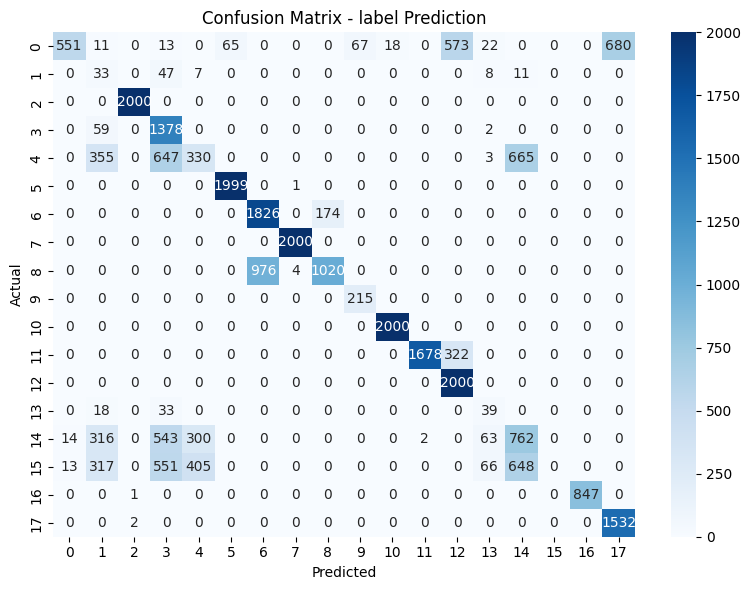

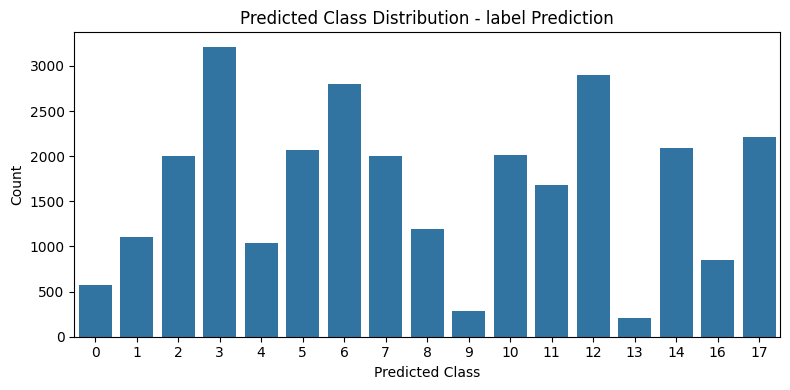


✅ Accuracy: 0.7159
✅ Weighted F1 Score: 0.6878
✅ Macro F1 Score: 0.6510
✅ Macro Precision: 0.6607
✅ Macro Recall: 0.7102
❌ Hamming Loss: 0.284146


In [138]:
display_metrics(
    y_true=y_test,
    y_pred=predictions_rfc["label"].values,
    title="label Prediction"  # optional
)

XGB graddient boosting



In [139]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

y_proba = xgb_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:12:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Label Prediction ---

📋 Classification Report:
    precision    recall  f1-score  support
0    0.996997  0.996000  0.996498   2000.0
1    0.104907  0.584906  0.177905    106.0
2    1.000000  1.000000  1.000000   2000.0
3    0.970250  0.997220  0.983550   1439.0
4    0.575387  0.446500  0.502815   2000.0
5    1.000000  1.000000  1.000000   2000.0
6    0.999500  0.999500  0.999500   2000.0
7    1.000000  1.000000  1.000000   2000.0
8    0.999500  0.999500  0.999500   2000.0
9    0.995370  1.000000  0.997680    215.0
10   1.000000  1.000000  1.000000   2000.0
11   1.000000  1.000000  1.000000   2000.0
12   1.000000  1.000000  1.000000   2000.0
13   0.307407  0.922222  0.461111     90.0
14   0.613250  0.541500  0.575146   2000.0
15   0.646613  0.639500  0.643037   2000.0
16   1.000000  1.000000  1.000000    848.0
17   1.000000  1.000000  1.000000   1534.0


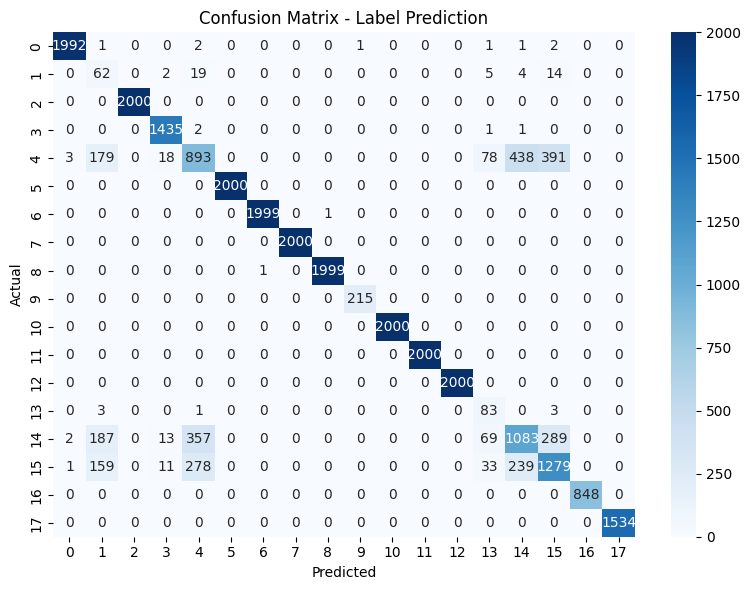

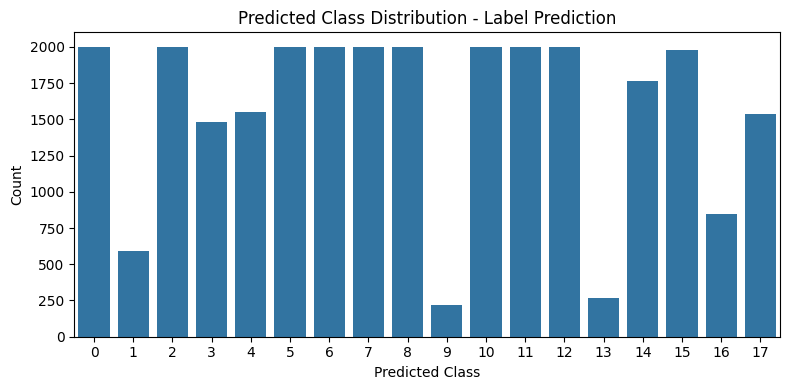


✅ Accuracy: 0.9005
✅ Weighted F1 Score: 0.9034
✅ Macro F1 Score: 0.8520
✅ Macro Precision: 0.8450
✅ Macro Recall: 0.8959
❌ Hamming Loss: 0.099532


In [140]:
display_metrics(y_test, y_pred_xgb, "Label Prediction")

Logistic Regression


In [141]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg_model.predict(X_test)

y_proba = logreg_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- Label Prediction ---

📋 Classification Report:
    precision    recall  f1-score  support
0    0.982133  0.907000  0.943073   2000.0
1    0.023824  0.358491  0.044680    106.0
2    0.976086  1.000000  0.987898   2000.0
3    0.476833  0.736623  0.578919   1439.0
4    0.314410  0.072000  0.117168   2000.0
5    0.999500  0.999500  0.999500   2000.0
6    0.997504  0.999000  0.998251   2000.0
7    0.992556  1.000000  0.996264   2000.0
8    0.998992  0.991000  0.994980   2000.0
9    0.845850  0.995349  0.914530    215.0
10   0.999000  0.999500  0.999250   2000.0
11   1.000000  1.000000  1.000000   2000.0
12   0.960425  0.995000  0.977407   2000.0
13   0.195000  0.433333  0.268966     90.0
14   0.328823  0.401000  0.361343   2000.0
15   0.375165  0.142000  0.206021   2000.0
16   1.000000  0.944575  0.971498    848.0
17   0.994788  0.995437  0.995112   1534.0


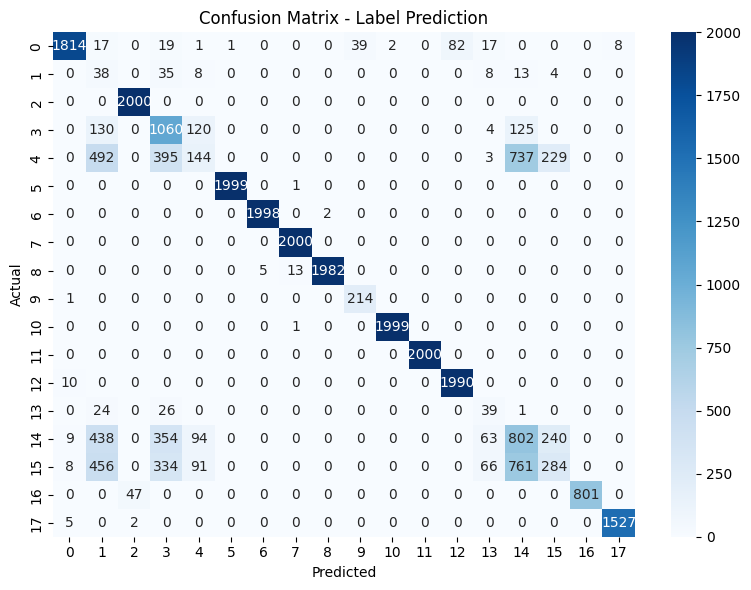

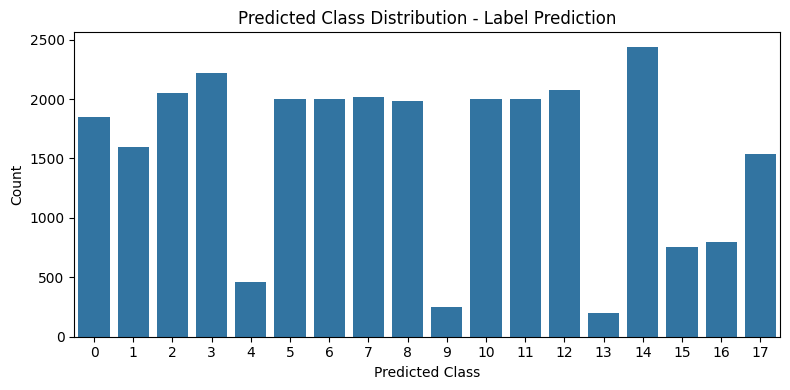


✅ Accuracy: 0.8037
✅ Weighted F1 Score: 0.7995
✅ Macro F1 Score: 0.7419
✅ Macro Precision: 0.7478
✅ Macro Recall: 0.7761
❌ Hamming Loss: 0.196267


In [142]:
display_metrics(y_test, y_pred_logreg, "Label Prediction")


Stacked Model

In [147]:
class StackedEnsemble:
    def __init__(self, n_folds=5, random_state=42):
        self.n_folds = n_folds
        self.random_state = random_state
        self.base_learners = [
            XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=random_state),
            RandomForestClassifier(n_estimators=200, random_state=random_state)
        ]
        self.meta_learner = LogisticRegression(multi_class='multinomial', max_iter=1000)
        self.classes_ = None

    def fit(self, X, y):
        # Convert DataFrame/Series to NumPy arrays if needed
        if hasattr(X, "values"):
            X = X.values
        if hasattr(y, "values"):
            y = y.values

        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        n_samples = X.shape[0]
        base_preds = np.zeros((n_samples, n_classes * len(self.base_learners)))

        skf = StratifiedKFold(n_splits=self.n_folds, shuffle=True, random_state=self.random_state)

        for i, model in enumerate(self.base_learners):
            oof_preds = np.zeros((n_samples, n_classes))
            for train_idx, val_idx in skf.split(X, y):
                X_train_fold, X_val_fold = X[train_idx], X[val_idx]
                y_train_fold = y[train_idx]
                model.fit(X_train_fold, y_train_fold)
                oof_preds[val_idx, :] = model.predict_proba(X_val_fold)
            base_preds[:, i*n_classes:(i+1)*n_classes] = oof_preds
            model.fit(X, y)

        self.meta_learner.fit(base_preds, y)

    def predict_proba(self, X):
        if hasattr(X, "values"):
            X = X.values
        n_classes = len(self.classes_)
        base_preds = np.zeros((X.shape[0], n_classes * len(self.base_learners)))
        for i, model in enumerate(self.base_learners):
            base_preds[:, i*n_classes:(i+1)*n_classes] = model.predict_proba(X)
        return self.meta_learner.predict_proba(base_preds)

    def predict(self, X):
        probs = self.predict_proba(X)
        preds = np.argmax(probs, axis=1)
        return preds


In [ ]:
stacked = StackedEnsemble(n_folds=5)


stacked.fit(X_train, y_train)



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:37:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:38:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:39:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Label ---

📋 Classification Report:
    precision    recall  f1-score  support
0    0.996998  0.996500  0.996749   2000.0
1    0.262172  0.660377  0.375335    106.0
2    1.000000  1.000000  1.000000   2000.0
3    0.971564  0.997220  0.984225   1439.0
4    0.588060  0.492500  0.536054   2000.0
5    1.000000  1.000000  1.000000   2000.0
6    0.999500  0.999500  0.999500   2000.0
7    1.000000  1.000000  1.000000   2000.0
8    0.999500  0.999500  0.999500   2000.0
9    0.995349  0.995349  0.995349    215.0
10   1.000000  1.000000  1.000000   2000.0
11   1.000000  1.000000  1.000000   2000.0
12   1.000000  1.000000  1.000000   2000.0
13   0.464968  0.811111  0.591093     90.0
14   0.658423  0.639000  0.648566   2000.0
15   0.684757  0.725500  0.704540   2000.0
16   1.000000  1.000000  1.000000    848.0
17   1.000000  1.000000  1.000000   1534.0


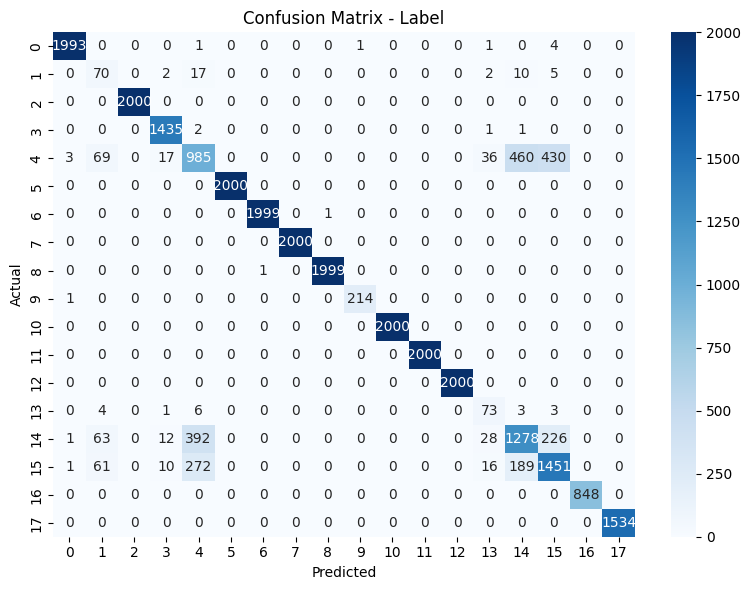

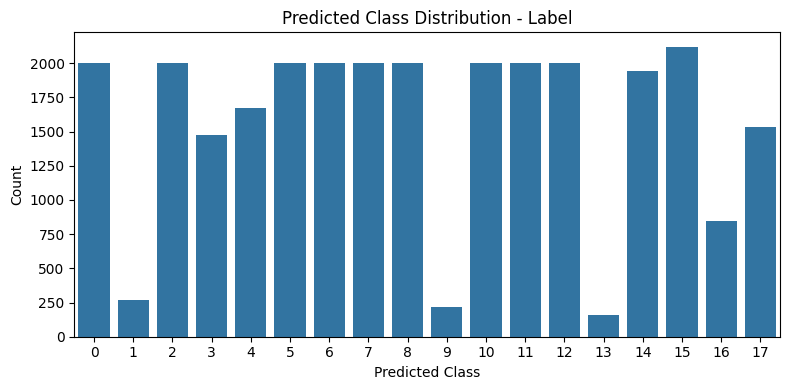


✅ Accuracy: 0.9167
✅ Weighted F1 Score: 0.9165
✅ Macro F1 Score: 0.8795
✅ Macro Precision: 0.8678
✅ Macro Recall: 0.9065
❌ Hamming Loss: 0.083345


In [144]:
y_pred_attack = stacked.predict(X_test)
y_proba = stacked.predict_proba(X_test)[:, 1]
display_metrics(y_test, y_pred_attack,"Label")